### **Introduction to Artificial Neural Networks with Keras** (Chapter 10)

https://github.com/ageron/handson-ml2

### <font color="blue">Setting up a virtual environement</font> 

Often times in Python (similar to R) the best way to sync the packages that one needs is to create a <font color='purple'>**new installation**</font>. On **Mac** and using **Anaconda**, the steps are

1) Create a **new environment** with the version of Python and the main packages you want, e.g.

<font color='darkpink'> conda create -n DSML_TF python=3.7 tensorflow numpy pandas scipy scikit-learn statsmodels matplotlib seaborn jupyterlab python-graphviz
 </font>

2) Then **activate** the environment DSML **before** starting your Jupyter Lab/Notebook 

<font color='darkpink'> conda activate DSML_TF </font>

Or if you need to install an additional package, before activate the environment, you might install *pydot*

<font color='darkpink'> conda install -c anaconda pydot </font>  

(_or perhaps_: <font color='darkpink'>conda install -c conda-forge pydot</font> )

3) When you are done deactivate the environment - only one is active at any point, so Anacond knows what to do:

<font color='darkpink'> conda deactivate </font>

In [ ]:
%load_ext autoreload
%autoreload 2

#### Setup

Let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
## Scikit-Learn ≥0.20 is required - do NOT comment out, it's used in TF!!!
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

### --- To be able to use scikit-learn (SKL) for hyperparameter tunning, downgrade the SKL version 

Activate your environment and install an older version:

<font color='darkpink'> conda activate AML_TF

<font color='darkpink'> conda install scikit-learn==0.21.2  </font>

In [3]:
sklearn.__version__  # was: '0.23.2'

'1.0.2'

In [4]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
# Tree plotting
import pydot
from IPython.display import Image
import graphviz
from io import StringIO  

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [6]:
# import tensorflow as tf
from tensorflow import keras

In [7]:
tf.__version__

'2.8.0'

In [8]:
keras.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is **already split** for you between a **training** set and a **test** set, but it can be <font color='blue'>useful to split the training set further to have a validation set</font>:

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [10]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
pd.set_option('display.max_columns', 100)
pd.DataFrame(X_train_full[0,:,:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [15]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
# print(X_train_full[1,:,:]) # 1 image

#### Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

In [ ]:
#X_train[0]

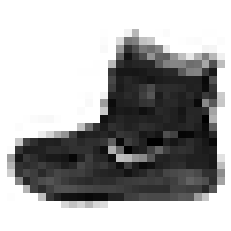

In [ ]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding 10 class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]] # y=4

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


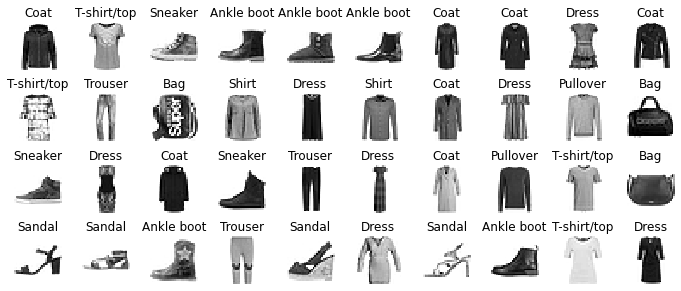

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

####  Start building the model

Use the Sequential API.simplest kind of Keras model for neural networks that are just composed of a **single stack of layers connected sequentially**. 

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))

model.add(keras.layers.Dense(300, activation="relu")) # hidden layer 1
model.add(keras.layers.Dense(100, activation="relu")) # hidden layer 2
model.add(keras.layers.Dense(10,  activation="softmax")) # max( output(i)/sum(output(j), j=0,1,...,9), i=0,...,9) => [0,1]

In [ ]:
### Reset session 
from tensorflow.keras.backend import clear_session

In [ ]:
clear_session()
np.random.seed(555) #(42)
tf.random.set_seed(555) #(42)

In [ ]:
### Another syntax for the same model 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###  A plot of the model structure

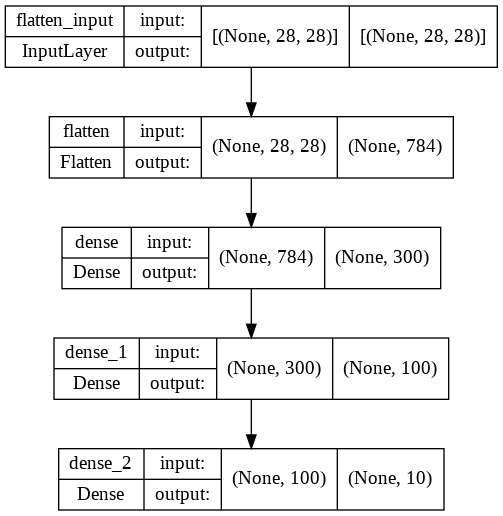

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden2 = model.layers[2]
hidden2.name

'dense_1'

In [ ]:
# some more information available in 'model'

In [ ]:
model.get_layer(hidden2.name) is hidden2

True

In [ ]:
weights, biases = hidden2.get_weights()

In [ ]:
weights

array([[ 0.06717192,  0.08789372,  0.03595584, ...,  0.08240473,
         0.10832307, -0.09728754],
       [ 0.02142016,  0.00534778,  0.0660788 , ..., -0.05591282,
        -0.06760298, -0.09108049],
       [-0.08921246, -0.02378049,  0.02145841, ...,  0.06382158,
        -0.01219756,  0.03477574],
       ...,
       [ 0.02474492,  0.07730637, -0.03976243, ..., -0.11225883,
         0.10993659, -0.06591722],
       [ 0.0917478 , -0.09542862, -0.07711543, ..., -0.09255559,
        -0.08973876, -0.08943006],
       [-0.11397051, -0.10458469,  0.02305057, ...,  0.00968454,
         0.08377012,  0.01591364]], dtype=float32)

In [ ]:
weights.shape

(300, 100)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
biases.shape

(100,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD", #  optimizer="adam"
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) # epochs=30

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7060 - accuracy: 0.7667 - val_loss: 0.4915 - val_accuracy: 0.8304
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4847 - accuracy: 0.8313 - val_loss: 0.4398 - val_accuracy: 0.8482
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4402 - accuracy: 0.8446 - val_loss: 0.4253 - val_accuracy: 0.8490
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4145 - accuracy: 0.8549 - val_loss: 0.3988 - val_accuracy: 0.8636
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3943 - accuracy: 0.8613 - val_loss: 0.3956 - val_accuracy: 0.8624
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3785 - accuracy: 0.8661 - val_loss: 0.3701 - val_accuracy: 0.8712
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3659 - accuracy: 0.8710 - val_loss: 0.3815 - val_accuracy:

In [ ]:
history.params

{'epochs': 20, 'steps': 1719, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


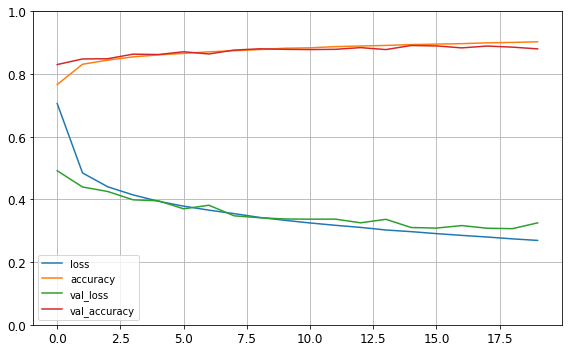

In [ ]:
# import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=0) # [0.33780701770782473, 0.8781]

[0.35948389768600464, 0.8693000078201294]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.9 , 0.  , 0.09, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict(X_new)
y_pred

array([[6.71503403e-06, 2.68654003e-06, 1.37011716e-06, 1.25279394e-05,
        1.32943869e-05, 1.33724110e-02, 1.23886111e-05, 2.58055963e-02,
        1.82463764e-03, 9.58948374e-01],
       [1.13452727e-03, 1.59162137e-05, 9.03930306e-01, 4.93824564e-06,
        9.16903764e-02, 1.31192768e-09, 3.20877694e-03, 6.04724812e-11,
        1.50997366e-05, 2.10575071e-10],
       [1.61219032e-05, 9.99977112e-01, 1.17710954e-06, 2.68527538e-06,
        2.34488994e-06, 3.54120422e-12, 1.20423294e-07, 3.72704221e-07,
        2.74607626e-09, 1.07791234e-10]], dtype=float32)

In [ ]:
np.array([y_pred])

array([[[6.71503403e-06, 2.68654003e-06, 1.37011716e-06, 1.25279394e-05,
         1.32943869e-05, 1.33724110e-02, 1.23886111e-05, 2.58055963e-02,
         1.82463764e-03, 9.58948374e-01],
        [1.13452727e-03, 1.59162137e-05, 9.03930306e-01, 4.93824564e-06,
         9.16903764e-02, 1.31192768e-09, 3.20877694e-03, 6.04724812e-11,
         1.50997366e-05, 2.10575071e-10],
        [1.61219032e-05, 9.99977112e-01, 1.17710954e-06, 2.68527538e-06,
         2.34488994e-06, 3.54120422e-12, 1.20423294e-07, 3.72704221e-07,
         2.74607626e-09, 1.07791234e-10]]], dtype=float32)

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


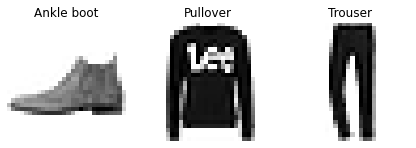

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the Boston house prices data https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

California housing dataset (the original one, not the modified one as in chapter 2) wouldn't load for me. But you can get a copy here:

https://github.com/ageron/handson-ml2/tree/master/datasets/housing


Specifically, it contains:

median house value, median income, housing median age, total rooms, total bedrooms, population, households, latitude, longitude  - in that (?) order.

In [ ]:
# fetch_california_housing?

In [ ]:
from sklearn.datasets import fetch_california_housing, load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#housing = fetch_california_housing()
#housing = load_boston()

In [ ]:
# Download the dataset as explained in HOML, Chap2 "End-to-end Machine Learning Project"

In [ ]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)    

In [ ]:
# download data
fetch_housing_data()

In [ ]:
# get the data as a dataframe
housing = load_housing_data()
housing.head()

In [ ]:
# There are some missing values - only 207
housing.isna().sum()

In [ ]:
# Let's remove them. For other appoaches, consult Chap2 "End-to-end Machine Learning Project" (p.62)
housing = housing.dropna(subset=["total_bedrooms"])
#housing = housing[~housing.total_bedrooms.isna()]

In [ ]:
housing.shape

In [ ]:
housing.isna().sum() # ok now

#### Quick look at the data

In [ ]:
# housing.info()
# housing.describe()

In [ ]:
# housing.corr()
housing.hist(bins=50, figsize=(20,15)) 
plt.show()

In [ ]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
h_data = housing.iloc[:,:8].to_numpy()
h_target = housing.iloc[:,8].to_numpy()

X_train_full, X_test, y_train_full, y_test = train_test_split(h_data, h_target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
### Build a simple linear regression as a base model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
housing_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

#### Now, build a NN 

In [ ]:
#keras.backend.clear_session()
clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# NOTE that the 'relu' activation is not working here
model= keras.models.Sequential([
    #keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:], kernel_initializer="he_normal"),
    keras.layers.Dense(30, activation="sigmoid",kernel_initializer="glorot_normal"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3)) #,clipvalue=1.0))
#model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) # 20

In [ ]:
mse_test = model.evaluate(X_test, y_test, verbose = 0)
mse_test

In [ ]:
# Root Mean Squared Error (RMSE)
np.sqrt(mse_test)

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.gca()
plt.show()

In [ ]:
y_pred

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="tanh")(input_)  # 'relu' activaton??
hidden2 = keras.layers.Dense(30, activation="tanh")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

What if you want to send different subsets of input features through the wide or deep paths? 

We will send 5 features (features 0 to 4), and 6 (features 2 to 7) through the **deep path**. Note that 3 features will go through both (features 2, 3 and 4).

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")  # shape=[10]
input_B = keras.layers.Input(shape=[6], name="deep_input")  # shape=[11]
hidden1 = keras.layers.Dense(30, activation="tanh")(input_B)
hidden2 = keras.layers.Dense(30, activation="tanh")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]  # X_train[:, :10], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]  # X_valid[:, :10], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]      # X_test[:, :10], X_test[:, 2:] 
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Adding an auxiliary output for regularization:

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input") # shape=[10]
input_B = keras.layers.Input(shape=[6], name="deep_input") # shape=[11]
hidden1 = keras.layers.Dense(30, activation="tanh")(input_B) # relu
hidden2 = keras.layers.Dense(30, activation="tanh")(hidden1) # relu
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [ ]:
# 5160/5160 [==============================] - 0s 19us/sample - loss: 0.4656 - main_output_loss: 0.4165 - aux_output_loss: 0.9111

# Saving and Restoring

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), # input_shape=[13]
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

In [ ]:
model.save("my_keras_model.h5")

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
model.predict(X_new)

In [ ]:
model.save_weights("my_keras_weights.ckpt")

In [ ]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [ ]:
clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="tanh", input_shape=[8]), # input_shape=[13]
    keras.layers.Dense(30, activation="tanh"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

# TensorBoard

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

In [ ]:
# from tensorflow.keras.backend import clear_session
# keras.backend.clear_session()
clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="tanh", input_shape=[8]), # input_shape=[13]
    keras.layers.Dense(30, activation="tanh"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

**Before** you start TensorBoard (TB) you might want to free port 6006 (the port where you usually run the TB server):

In [ ]:
# To free the 6006 port run (in the termnal):

!lsof -i tcp:6006 | grep -v PID | awk '{print $2}' | xargs kill

### fuser 6006/tcp -k

And also clean-up some of the old logs:

! rm -rf ./my_logs/run_2021_02_01-00_11_52/

You can also delete these not needed log directories directly from the "File Browser" in Jupyter Lab.

**To start** the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
# Current log directory
run_logdir2 = get_run_logdir()
run_logdir2

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="tanh", input_shape=[8]), #input_shape=[13]
    keras.layers.Dense(30, activation="tanh"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # 0.05

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [ ]:
help(keras.callbacks.TensorBoard.__init__)

In [ ]:
### Additional capabilites of TensorBoard

In [ ]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir) 
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data 
        
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images 
        tf.summary.image("my_images", images * step / 1000, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step**2)] 
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step) 
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1]) 
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

### Fine-Tuning Neural Network Hyperparameters

The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. 
Not only can you use any imaginable network architecture, but even in a simple MLP you can change the:

* number of layers

* number of neurons per layer

* activation function to use in each layer, the 

* weight initialization logic, etc. 

How do you know what combination of hyperparameters is the best for your task?

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross-validation). 
For example, we can use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space, as is done in Chapter 2. 
To do this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile 
a Keras model, given a set of hyperparameters:

In [ ]:
clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]): # input_shape=[13]): 
    model = keras.models.Sequential() 
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="tanh"))  # was" 'relu'
        
    model.add(keras.layers.Dense(1))
    
    #optimizer = keras.optimizers.SGD(lr=learning_rate)
    # ask for Adam:
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    
    model.compile(loss="mse", optimizer=optimizer)
    return model

We don’t want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search (as we discussed in Chapter 2). Let’s try to explore the number of hidden layers, the number of neurons, and the learning rate:

In [ ]:
X_train.shape, X_valid.shape

In [ ]:
mod_test = build_model() 
mod_test.summary()

In [ ]:
### to measure run time
import time

#### **IMPORTANT**: the search below takes ~52 mins!

To reduce run time, you can reduce the number of parameter combination or use other methods described in Chapter 10. Specifically check out the "stretch pants" approach on p.325.

In [ ]:
start = time.process_time()

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# define a hyper-parameter grid
param_distribs = {
        "n_hidden": [0, 1, 2], # [0, 1, 2, 3],
        "n_neurons": np.arange(4,20),  # np.arange(1, 100), # tuple(),
        "learning_rate": reciprocal(3e-4, 3e-2) #[0.3] # 
}

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

rnd_search_cv.fit(X_train, y_train, epochs=100
                  ,validation_data=(X_valid, y_valid)
                  ,callbacks=[keras.callbacks.EarlyStopping(patience=10)]
                  ,verbose=0)

In [ ]:
print(f'Time: {(time.process_time()-start)/60} mins') # 12mins

In [ ]:
rnd_search_cv.cv_results_

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model_b = rnd_search_cv.best_estimator_.model

In [ ]:
model_b.summary()